In [2]:
import sys
sys.path.insert(0, 'C:/Users/Franco/Documents/AnacondaProjects/Predicting_Conflicts')
from Libs import *
sys.path.insert(0, 'C:/Users/Franco/Documents/AnacondaProjects/Predicting_Conflicts/DataAnalisys')
from DataSplit import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [112]:
# Modelo con todas las variables
rf = RandomForestClassifier(n_estimators = 11,
                            max_depth = 28,
                            min_samples_split = 0.1,
                            min_samples_leaf = 0.5,
                            random_state = 20,
                            n_jobs = -1)
rf.fit(X_train, y_train.values.ravel())

rfx = ExtraTreesClassifier(n_estimators = 11,
                            max_depth = 28,
                            min_samples_split = 0.1,
                            min_samples_leaf = 0.5,
                            random_state = 20,
                            n_jobs = -1)
rfx.fit(X_train, y_train.values.ravel())

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=28, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=0.5, min_samples_split=0.1,
           min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=-1,
           oob_score=False, random_state=20, verbose=0, warm_start=False)

In [113]:
scores = cross_val_score(rfx, df_train_models.loc[:, ['country encoded', 'year', 'amount', 'Tools', 'Vehicles',                      
                                                        'Weapons', 'Prom Tools', 'Prom Vehicles', 'Prom Weapons', 'conflict-1-to-3', 
                                                        'conflict-4-to-6', 'conflict-7-to-9', 'Prom USA']], 
                         df_train_models.loc[:, ['conflict']].values.ravel(), 
                         cv=10, n_jobs=-1)
print(scores.mean())

scores_rf = cross_val_score(rf, df_train_models.loc[:, ['country encoded', 'year', 'amount', 'Tools', 'Vehicles',                      
                                                        'Weapons', 'Prom Tools', 'Prom Vehicles', 'Prom Weapons', 'conflict-1-to-3', 
                                                        'conflict-4-to-6', 'conflict-7-to-9', 'Prom USA']], 
                         df_train_models.loc[:, ['conflict']].values.ravel(), 
                         cv=10, n_jobs=-1)

print(scores_rf.mean())

0.8272350201865641
0.8272350201865641


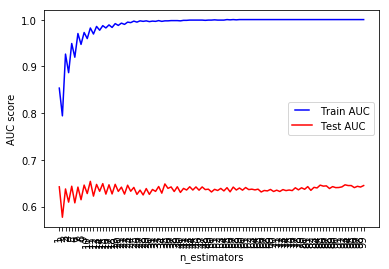

In [10]:
#n_estimators = [5, 9, 19]
n_estimators = [x for x in range(1, 100)]

train_results = []
test_results = []
tst = []


for estimator in n_estimators:
    #print(estimator)
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=20)
    rf.fit(X_train, y_train.values.ravel())

    train_pred = rf.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = rf.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    tst.append((roc_auc, estimator))
    
    
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')

plt.xticks(n_estimators)
plt.xticks(rotation=90)
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [12]:
max(tst)

(0.6537832496159357, 11)

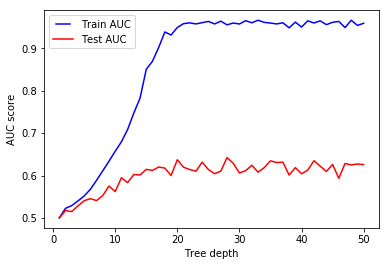

In [87]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []
tst = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train.values.ravel())

    train_pred = rf.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = rf.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    tst.append([[roc_auc],[max_depth]])
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [89]:
max(tst)

[[0.6422634767748951], [28.0]]

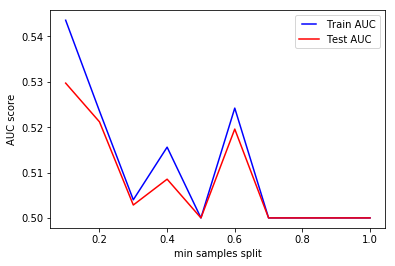

In [104]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []
tst = []

for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(X_train, y_train.values.ravel())

    train_pred = rf.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = rf.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    tst.append([[roc_auc],[min_samples_split]])

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [105]:
max(tst)

[[0.5297132031829873], [0.1]]

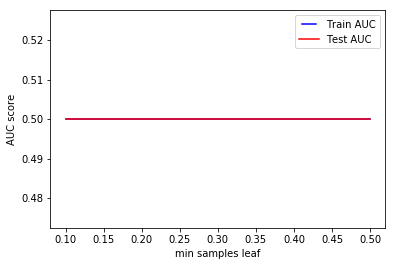

In [106]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
tst = []

train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, y_train.values.ravel())

    train_pred = rf.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = rf.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    tst.append([[roc_auc],[min_samples_leaf]])
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [107]:
max(tst)

[[0.5], [0.5]]

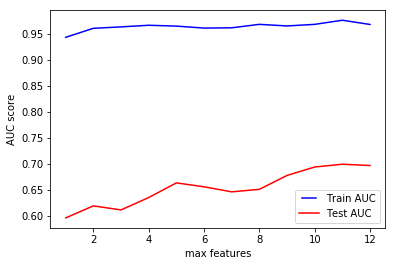

In [108]:
train = df_train_models.loc[:, ['country encoded', 'year', 'amount', 'Tools', 'Vehicles',                      
                                'Weapons', 'Prom Tools', 'Prom Vehicles', 'Prom Weapons', 'conflict-1-to-3', 
                                'conflict-4-to-6', 'conflict-7-to-9', 'Prom USA']]

max_features = list(range(1,train.shape[1]))

train_results = []
test_results = []
tst = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(X_train, y_train.values.ravel())

    train_pred = rf.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = rf.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    tst.append([[roc_auc],[max_feature]])
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [109]:
max(tst)

[[0.6994869072894552], [11]]